In [1]:
import pandas as pd
import numpy as np
import time
import datetime
from tqdm import tqdm
import random

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
data = pd.read_csv('bolha_flats_all_info1-49_14-03-2021_20-55-58.csv')

In [3]:
data= data.drop('Unnamed: 0', axis = 1)

In [4]:
data.head()

,Šifra oglasa,Objavljen,Do poteka še,Število prikazov oglasa,Cena,Vrsta cene,Posredovanje,Lokacija,Umeščenost stanovanja,Nadstropje,...,Neto površina,Leto izgradnje*,Leto zadnje prenove,Opremljenost in stanje,Energetski razred,Možnost menjave,Število parkirnih mest,Balkon / terasa / atrij,Zunanje površine in oprema,Interna številka oglasa
0,6523968,14.03.2021dne18:49,"\n29dni,22h,33min.\n",57-krat,\n\n192.000 €\n,Skupna cena,Prodam,"Savinjska, Celje, Slavko Šlander",V večstanovanjski stavbi,1.,...,"105,00 m²",2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6523894,14.03.2021dne18:39,"\n29dni,22h,24min.\n",29-krat,\n\n134.500 €\n,Skupna cena,Prodam,"Osrednjeslovenska, Ljubljana Center, Center",V večstanovanjski stavbi,Pritličje,...,"29,30 m²",1908.0,2020.0,Popolnoma opremljeno,EI ni potrebna (334. člen EZ-1),Možna menjava za drugo nepremičnino,NaN,NaN,NaN,NaN
2,6523589,14.03.2021dne18:07,"\n29dni,21h,52min.\n",33-krat,\n\n29.500 €\n,Skupna cena,Prodam,"Gorenjska, Tržič, Tržič",V večstanovanjski stavbi,1.,...,"11,00 m²",1961.0,NaN,NaN,E (105 - 150 kWh/m2a),NaN,NaN,NaN,NaN,NaN
3,6523431,14.03.2021dne17:47,"\n29dni,21h,32min.\n",34-krat,\n\n120.000 €\n,Skupna cena,Prodam,"Savinjska, Slovenske Konjice, Slovenske Konjice",V večstanovanjski stavbi,1.,...,"70,00 m²",2020.0,NaN,Neopremljeno,A2 (10 - 15 kWh/m2a),NaN,7+,"Balkon, Loža",NaN,NaN
4,6523190,14.03.2021dne17:16,"\n29dni,21h,0min.\n",23-krat,\n\n180.000 €\n,Skupna cena,Prodam,"Osrednjeslovenska, Ljubljana Bežigrad, Bežigrad",V večstanovanjski stavbi,7.,...,NaN,1988.0,NaN,NaN,NaN,NaN,NaN,Zaprt balkon,NaN,NaN


In [6]:
data.columns

Index(['Šifra oglasa', 'Objavljen ', 'Do poteka še', 'Število prikazov oglasa',
       'Cena', 'Vrsta cene', 'Posredovanje', 'Lokacija',
       'Umeščenost stanovanja', 'Nadstropje',
       'Skupno število nadstropij v stavbi', 'Vrsta stanovanja',
       'Bivalna površina', 'Neto površina', 'Leto izgradnje*',
       'Leto zadnje prenove', 'Opremljenost in stanje', 'Energetski razred',
       'Možnost menjave', 'Število parkirnih mest', 'Balkon / terasa / atrij',
       'Zunanje površine in oprema', 'Interna številka oglasa'],
      dtype='object')

## Preprocessing 
Manipulating entries to derive numerical features from raw screaped values. 

In [21]:
# taking a look at the unique values of for columns (all but the first 5)
for column in data.columns[5:]:
    print(data[column].unique())

['\n\n192.000\xa0€\n' '\n\n134.500\xa0€\n' '\n\n29.500\xa0€\n'
 '\n\n120.000\xa0€\n' '\n\n180.000\xa0€\n' '\n\n69.900\xa0€\n'
 '\n\n75.000\xa0€\n' '\n\n50.000\xa0€\n' '\npodogovoru'
 '\n\n165.000\xa0€\n' '\n\n130.000\xa0€\n' '\n\n116.900\xa0€\n'
 '\n\n69.000\xa0€\n' '\n\n40.800\xa0€\n' '\n\n0\xa0€\n'
 '\n\n55.000\xa0€\n' '\n\n48.000\xa0€\n' '\n\n99.900\xa0€\n'
 '\n\n159.900\xa0€\n' '\n\n98.900\xa0€\n' '\n\n90.000\xa0€\n'
 '\n\n98.000\xa0€\n' '\n\n210.000\xa0€\n' '\n\n49.104\xa0€\n'
 '\n\n65.000\xa0€\n' '\n\n199.000\xa0€\n' '\n\n223.932,98\xa0€\n'
 '\n\n174.074,89\xa0€\n' '\n\n129.226,43\xa0€\n' '\n\n156.119,63\xa0€\n'
 '\n\n140.000\xa0€\n' '\n\n67.500\xa0€\n' '\n\n220.000\xa0€\n'
 '\n\n105.000\xa0€\n' '\n\n160.000\xa0€\n' '\n\n40.000\xa0€\n'
 '\n\n135.000\xa0€\n' '\n\n389.900\xa0€\n' '\n\n14.000\xa0€\n'
 '\n\n84.000\xa0€\n' '\n\n60.000\xa0€\n' '\n\n149.000\xa0€\n'
 '\n\n168.000\xa0€\n' '\n\n45.000\xa0€\n' '\n\n145.000\xa0€\n'
 '\n\n230.000\xa0€\n' '\n\n187.800\xa0€\n' '\n\n1.690\xa0€\n

In [5]:
# Objavljen > objavljen posted_date + posted_time...
def prepareFeatures (df): 
    a = {}
    main_df = pd.DataFrame()
    
    for i in tqdm(range(0,len(df))):
        a['AD_ID'] = df.iloc[i]['Šifra oglasa']

        a['posted_date'] = df.iloc[i]['Objavljen '].split('dne')[0]
        a['posted_time'] = df.iloc[i]['Objavljen '].split('dne')[1]

        a['shown'] = df.iloc[i]['Število prikazov oglasa'].split('-')[0]

        
        price = np.nan if df.iloc[i]['Cena'] == '\npodogovoru' else int(df.iloc[i]['Cena'].split('\n')[2].split('\xa0')[0].replace('.','').split(',')[0])
        a['price'] = price
        a['currency'] = np.nan if df.iloc[i]['Cena'] == '\npodogovoru' else df.iloc[i]['Cena'].split('\n')[2].split('\xa0')[1]

        a['ptype'] = 'cumulative' if df.iloc[i]['Vrsta cene'] == 'Skupna cena' else 'perM2'

        a['l_region'] = df.iloc[i]['Lokacija'].split(',')[0]
        a['l_2'] = df.iloc[i]['Lokacija'].split(',')[1].replace(' ', '')
        a['l_3'] = df.iloc[i]['Lokacija'].split(',')[2].replace(' ', '')

        a['sits_in'] = df.iloc[i]['Umeščenost stanovanja']

        a['lvl'] = df.iloc[i]['Nadstropje'] if str(df.iloc[i]['Nadstropje']) == 'nan' else     'P' if df.iloc[i]['Nadstropje'] == 'Pritličje' else 'K' if df.iloc[i]['Nadstropje'] == 'Klet' else     'M' if df.iloc[i]['Nadstropje'] == 'Mansarda' else    'VP' if df.iloc[i]['Nadstropje'] == 'Visoko pritličje' else df.iloc[i]['Nadstropje'].split('.')[0] 

        a['t_lvl'] = df.iloc[i]['Skupno število nadstropij v stavbi'] if str(df.iloc[i]['Skupno število nadstropij v stavbi']) == 'nan' else int(df.iloc[i]['Skupno število nadstropij v stavbi'])

        a['flat_type'] = df.iloc[i]['Vrsta stanovanja']

        
        size = df.iloc[i]['Bivalna površina'] if str(df.iloc[i]['Bivalna površina']) == 'nan' else int(df.iloc[i]['Bivalna površina'].split(',')[0].replace('.',''))
        a['sizeM2'] = size
        
        net_size = df.iloc[i]['Neto površina'] if str(df.iloc[i]['Neto površina']) == 'nan' else int(df.iloc[i]['Neto površina'].split(',')[0].replace('.',''))
        a['net_sizeM2'] = net_size
        
        a['price/sizeM2'] = price/size if str(net_size) != 'nan' and str(price) != 'nan' else np.nan
        a['price/net_sizeM2']  = price/net_size if str(net_size) != 'nan' and str(price) != 'nan' else np.nan
        
        a['year_built'] = df.iloc[i]['Leto izgradnje*'] if str(df.iloc[i]['Leto izgradnje*']) == 'nan' else df.iloc[i]['Leto izgradnje*']

        a['year_ren'] = df.iloc[i]['Leto zadnje prenove'] if str(df.iloc[i]['Leto zadnje prenove']) == 'nan' else df.iloc[i]['Leto zadnje prenove']

        a['condition'] = df.iloc[i]['Opremljenost in stanje']

        a['en_eff'] = df.iloc[i]['Energetski razred'] if str(df.iloc[i]['Energetski razred']) == 'nan'else df.iloc[i]['Energetski razred'].split(' ')[0] + df.iloc[i]['Energetski razred'].split(' ')[-1] if str(df.iloc[i]['Energetski razred'].split(' ')[-1]) == 'HR' else  df.iloc[i]['Energetski razred'].split(' ')[0]

        a['switch'] = df.iloc[i]['Možnost menjave'] if str(df.iloc[i]['Možnost menjave']) == 'nan' else 'yes' if df.iloc[i]['Možnost menjave'] == 'Možna menjava za drugo nepremičnino' else 'no' if df.iloc[i]['Možnost menjave'] == 'Menjava za drugo nepremičnino ni možna'  else np.nan

        a['park_spots'] =  '0' if df.iloc[i]['Število parkirnih mest']  == 'brez pripadajočega parkirišča' else df.iloc[i]['Število parkirnih mest'].split('+')[0] if str(df.iloc[i]['Število parkirnih mest']) != 'nan' else np.nan
       
        a['balcony'] = 1 if str(df.iloc[i]['Balkon / terasa / atrij']) != 'nan' else 0
        a['garden'] = 1 if str(df.iloc[i]['Zunanje površine in oprema']) != 'nan' else 0
        
        a_df = pd.DataFrame.from_dict([a])
        main_df = pd.concat([main_df,a_df],axis=0, ignore_index=True)
    return main_df

In [105]:
df.iloc[0]['Skupno število nadstropij v stavbi']

2.0

In [76]:
df.iloc[1]['Lokacija'].split(',')[1].replace(' ', '')

'LjubljanaCenter'

In [86]:
# taking a look at the unique values of for columns (all but the first 5)
for column in df.columns[5:]:
    print(column)
    print(df[column].unique())

Vrsta cene
['Skupna cena' 'Cena na m²']
Posredovanje
['Prodam']
Lokacija
['Savinjska, Celje, Slavko Šlander'
 'Osrednjeslovenska, Ljubljana Center, Center' 'Gorenjska, Tržič, Tržič'
 'Savinjska, Slovenske Konjice, Slovenske Konjice'
 'Osrednjeslovenska, Ljubljana Bežigrad, Bežigrad'
 'Podravska, Kidričevo, Kidričevo' 'Osrednjeslovenska, Domžale, Domžale'
 'Koroška, Podvelka, Podvelka' 'Osrednjeslovenska, Vrhnika, Vrhnika'
 'Osrednjeslovenska, Ljubljana Bežigrad, Stožice'
 'Savinjska, Velenje, Velenje' 'Podravska, Maribor, Nova Vas'
 'Podravska, Dornava, Dornava' 'Podravska, Ptuj, Ptuj'
 'Pomurska, Murska Sobota, Murska Sobota' 'Podravska, Starše, Prepolje'
 'Jugovzhodna Slovenija, Kočevje, Kočevje' 'Podravska, Maribor, Center'
 'Podravska, Maribor, Magdalena' 'Savinjska, Celje, Celje'
 'Podravska, Maribor, Studenci' 'Podravska, Ruše, Bistrica ob Dravi'
 'Izven Slovenije - Hrvaška, Zadarska, Vir'
 'Pomurska, Moravske Toplice, Moravske Toplice'
 'Savinjska, Celje, Nova vas' 'Primorsko-no

In [41]:
df['Objavljen '][4:5]

4    14.03.2021dne17:16
Name: Objavljen , dtype: object

In [6]:
data_prep = prepareFeatures(data)
data_prep.tail(5)

100%|██████████████████████████████████████████████████████████████████████████████| 1188/1188 [00:12<00:00, 93.78it/s]


,AD_ID,posted_date,posted_time,shown,price,currency,ptype,l_region,l_2,l_3,...,price/sizeM2,price/net_sizeM2,year_built,year_ren,condition,en_eff,switch,park_spots,balcony,garden
1183,2223586,10.12.2019,19:24,3878,60000.0,€,cumulative,Podravska,Maribor,Center,...,NaN,NaN,NaN,NaN,NaN,EI,NaN,NaN,0,0
1184,2217657,27.01.2019,11:07,4143,164250.0,€,cumulative,Pomurska,MurskaSobota,MurskaSobota,...,NaN,1520.833333,2019.0,NaN,NaN,B1,NaN,NaN,1,0
1185,2221094,27.01.2019,11:01,4162,150015.0,€,cumulative,Pomurska,MurskaSobota,MurskaSobota,...,NaN,NaN,2018.0,NaN,NaN,EI,NaN,NaN,0,0
1186,2222326,19.12.2018,10:09,1362,170000.0,€,cumulative,Osrednjeslovenska,LjubljanaMostePolje,Kodeljevo,...,NaN,NaN,1963.0,2013.0,NaN,EI,NaN,NaN,0,0
1187,2218508,14.11.2017,13:35,1176,90000.0,€,cumulative,Savinjska,Zreče,Zreče,...,NaN,NaN,1982.0,2015.0,NaN,NaN,NaN,NaN,0,0


In [50]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AD_ID             1188 non-null   int64  
 1   posted_date       1188 non-null   object 
 2   posted_time       1188 non-null   object 
 3   shown             1188 non-null   object 
 4   price             1161 non-null   float64
 5   currency          1161 non-null   object 
 6   ptype             1188 non-null   object 
 7   l_region          1188 non-null   object 
 8   l_2               1188 non-null   object 
 9   l_3               1188 non-null   object 
 10  sits_in           788 non-null    object 
 11  lvl               742 non-null    object 
 12  t_lvl             793 non-null    float64
 13  flat_type         1074 non-null   object 
 14  sizeM2            912 non-null    float64
 15  net_sizeM2        761 non-null    float64
 16  price/sizeM2      637 non-null    float64


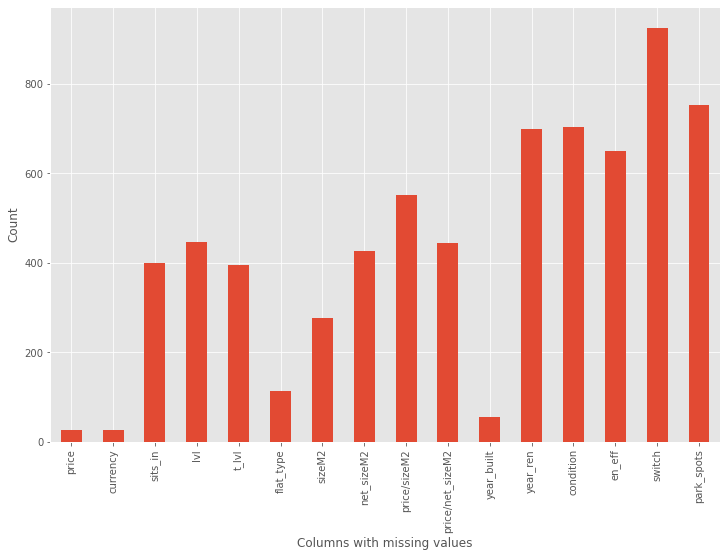

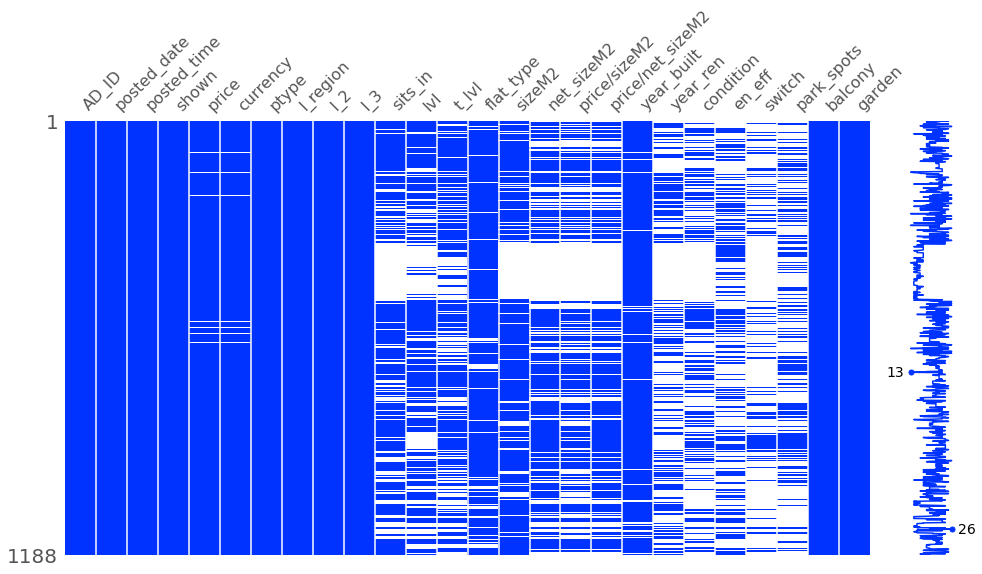

In [8]:
#Plot missing values 
def plot_missing(df):
    # Find columns having missing values and count
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    #missing.sort_values(inplace=True)
    
    # Plot missing values by count 
    missing.plot.bar(figsize=(12,8))
    plt.xlabel('Columns with missing values')
    plt.ylabel('Count')
    
    # search for missing data
    import missingno as msno
    msno.matrix(df=df, figsize=(16,8), color=(0,0.2,1))
    
plot_missing(data_prep)

In [9]:
#trying out some filtering:
data_prep_filtered1 = data_prep.loc[(data_prep['price']>50000) & (data_prep['price']<100000) & (data_prep['sizeM2']>80)]
data_prep_filtered1.head()

,AD_ID,posted_date,posted_time,shown,price,currency,ptype,l_region,l_2,l_3,...,price/sizeM2,price/net_sizeM2,year_built,year_ren,condition,en_eff,switch,park_spots,balcony,garden
17,3174984,14.03.2021,08:50,2045,99900.0,€,cumulative,Podravska,Maribor,Center,...,NaN,NaN,1945.0,2018.0,NaN,NaN,NaN,NaN,0,0
19,1452932,14.03.2021,08:20,3332,98900.0,€,cumulative,Podravska,Maribor,Center,...,NaN,NaN,1919.0,NaN,NaN,EI,NaN,NaN,0,0
20,6515431,14.03.2021,00:15,55,90000.0,€,cumulative,Savinjska,Celje,Celje,...,937.500000,937.500000,1700.0,2020.0,NaN,NaN,NaN,NaN,0,0
59,6504189,12.03.2021,10:42,34,92177.0,€,cumulative,Pomurska,Apače,Apače,...,NaN,NaN,2021.0,NaN,NaN,EI,NaN,NaN,1,0
93,6492171,11.03.2021,00:13,781,74270.0,€,cumulative,Podravska,Ptuj,Ptuj,...,558.421053,558.421053,1880.0,2010.0,Delno opremljeno,NaN,NaN,0,0,0


In [28]:
data_prep_filtered2= data_prep.loc[(data_prep['sizeM2'].isnull()) & (data_prep['net_sizeM2'].isnull()) & (data_prep['sits_in'].isnull())]
data_prep_filtered2

,AD_ID,posted_date,posted_time,shown,price,currency,ptype,l_region,l_2,l_3,...,price/sizeM2,price/net_sizeM2,year_built,year_ren,condition,en_eff,switch,park_spots,balcony,garden
10,6521099,14.03.2021,12:51,479,130000.0,€,cumulative,Savinjska,Velenje,Velenje,...,NaN,NaN,1973.0,NaN,NaN,D,NaN,NaN,1,0
36,6507148,13.03.2021,00:13,163,40000.0,€,cumulative,Koroška,RadljeobDravi,RadljeobDravi,...,NaN,NaN,1900.0,NaN,NaN,NaN,NaN,NaN,0,1
140,6484624,10.03.2021,00:12,40,655000.0,€,cumulative,Osrednjeslovenska,LjubljanaCenter,StaraLjubljana,...,NaN,NaN,1500.0,NaN,NaN,NaN,NaN,NaN,0,0
141,6484623,10.03.2021,00:12,65,1884000.0,€,cumulative,Osrednjeslovenska,LjubljanaCenter,Center,...,NaN,NaN,1500.0,NaN,NaN,NaN,NaN,NaN,0,0
142,6484622,10.03.2021,00:12,42,489000.0,€,cumulative,Osrednjeslovenska,LjubljanaCenter,Center,...,NaN,NaN,1500.0,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,6384167,25.02.2021,00:21,315,235000.0,€,cumulative,Obalno-kraška,Koper,Koper,...,NaN,NaN,1960.0,NaN,NaN,NaN,NaN,NaN,0,1
486,6384143,25.02.2021,00:21,539,125000.0,€,cumulative,Obalno-kraška,Izola,Izola,...,NaN,NaN,1969.0,NaN,NaN,NaN,NaN,NaN,0,0
487,6384138,25.02.2021,00:21,403,165000.0,€,cumulative,Obalno-kraška,Piran,Portorož,...,NaN,NaN,1980.0,NaN,NaN,NaN,NaN,1,0,0
488,6384080,25.02.2021,00:21,174,251440.0,€,cumulative,Obalno-kraška,Koper,Koper,...,NaN,NaN,2010.0,NaN,NaN,B1,NaN,2,0,0


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [29]:
X_set = data_prep.drop('price', axis =1)
y_set = data_prep['price']

In [30]:
X_set.head()
#y_set.head()

,AD_ID,posted_date,posted_time,shown,currency,ptype,l_region,l_2,l_3,sits_in,...,price/sizeM2,price/net_sizeM2,year_built,year_ren,condition,en_eff,switch,park_spots,balcony,garden
0,6523968,14.03.2021,18:49,57,€,cumulative,Savinjska,Celje,SlavkoŠlander,V večstanovanjski stavbi,...,2232.558140,1828.571429,2004.0,NaN,NaN,NaN,NaN,NaN,0,0
1,6523894,14.03.2021,18:39,29,€,cumulative,Osrednjeslovenska,LjubljanaCenter,Center,V večstanovanjski stavbi,...,4803.571429,4637.931034,1908.0,2020.0,Popolnoma opremljeno,EI,yes,NaN,0,0
2,6523589,14.03.2021,18:07,33,€,cumulative,Gorenjska,Tržič,Tržič,V večstanovanjski stavbi,...,2681.818182,2681.818182,1961.0,NaN,NaN,E,NaN,NaN,0,0
3,6523431,14.03.2021,17:47,34,€,cumulative,Savinjska,SlovenskeKonjice,SlovenskeKonjice,V večstanovanjski stavbi,...,NaN,1714.285714,2020.0,NaN,Neopremljeno,A2,NaN,7,1,0
4,6523190,14.03.2021,17:16,23,€,cumulative,Osrednjeslovenska,LjubljanaBežigrad,Bežigrad,V večstanovanjski stavbi,...,NaN,NaN,1988.0,NaN,NaN,NaN,NaN,NaN,1,0


In [26]:
def impute_cats(df):
    # Find the columns of object type along with their column index
    object_cols = list(df.select_dtypes(exclude=[np.number]).columns)
    object_cols_ind = []
    for col in object_cols:
        object_cols_ind.append(df.columns.get_loc(col))

    # Encode the categorical columns with numbers    
    label_enc = LabelEncoder()
    for i in object_cols_ind:
        df.iloc[:,i] = label_enc.fit_transform(df.iloc[:,i])

In [27]:
# Impute the missing values
impute_cats(X_set)
print("Train Dtype counts: \n{}".format(X_train.dtypes.value_counts()))

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']